## Libraries Set-Up & Loading Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
purchase_df = pd.read_csv('/content/QVI_purchase_behaviour.csv')
transaction_df = pd.read_excel('/content/QVI_transaction_data.xlsx', sheet_name='in')

In [ ]:
print(purchase_df.head(5))
print('\n')
print('\n')
print(transaction_df.head(5))

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream




    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Crea

In [ ]:
print(purchase_df.info())
print('\n')
print('\n')
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), obj

We donot have any null or missing values in both datasets but the datatype of "DATE" column transaction_df is incorrect. Lets correct it first.


In [ ]:
transaction_df['DATE']=pd.to_datetime(transaction_df['DATE'])
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [ ]:
transaction_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now the DATE's datatype is correct and values are also in right format. Now lets explore more about product and the data we want to focus on

In [ ]:
transaction_df['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Now this data is only of chips products but its better check whether all products are chip products

In [ ]:
pd.set_option('display.max_rows', None)
transaction_df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

After analysing the above product names by myself through testing it on google (to get best accuracy), I have found certain keywords that will help to remove non chip products 

In [ ]:
transaction_df=transaction_df[~transaction_df['PROD_NAME'].str.contains('Salsa|salsa|Papad|papad|Rings|rings|Jam|jam|Balls|balls|Burger|burger|dip|Dip|Puffs', na=False)]
transaction_df.reset_index(inplace=True)

In [ ]:
transaction_df.head(5)

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


The Index column is unncessary now lets drop it

In [ ]:
transaction_df.drop(['index'],axis=1, inplace=True)
transaction_df.head(5)

<ipython-input-11-dabb8234377b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df.drop(['index'],axis=1, inplace=True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now lets try some statistics factors

In [ ]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,233153.000000,2.331530e+05,2.331530e+05,233153.000000,233153.000000,233153.000000
mean,135.061007,1.355403e+05,1.351430e+05,55.275137,1.908742,7.415858
std,76.839684,8.073288e+04,7.821321e+04,33.689514,0.672955,3.105019
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,69.000000,6.925900e+04,6.746700e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303870e+05,1.352710e+05,51.000000,2.000000,7.400000
75%,203.000000,2.030990e+05,2.027170e+05,85.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


All other columns look fine but PROD_QTY has an outlier, with value 200. We need to to find how many trasactions have this value

In [ ]:
transaction_df.loc[transaction_df['PROD_QTY'] == 200.0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
61240,1970-01-01 00:00:00.000043331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
61241,1970-01-01 00:00:00.000043605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


One customer(loyalty card holder) has purchased 200 packets of chips 2 times, lets check his other transactions

In [ ]:
transaction_df.loc[transaction_df['LYLTY_CARD_NBR'] == 226000]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
61240,1970-01-01 00:00:00.000043331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
61241,1970-01-01 00:00:00.000043605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The customer only had two transactions and may not be a regular retail customer, but possibly buying chips for commercial purposes. Therefore, this loyalty card number will be excluded from further analysis.

In [ ]:
customer_index= transaction_df[transaction_df['LYLTY_CARD_NBR']==226000].index
transaction_df.drop(customer_index,inplace=True)

In [ ]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,233151.000000,2.331510e+05,2.331510e+05,233151.000000,233151.000000,233151.000000
mean,135.060227,1.355396e+05,1.351422e+05,55.275577,1.907043,7.410346
std,76.839552,8.073280e+04,7.821309e+04,33.689323,0.340971,2.469645
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,69.000000,6.925900e+04,6.746650e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303870e+05,1.352700e+05,51.000000,2.000000,7.400000
75%,203.000000,2.030990e+05,2.027155e+05,85.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


The outlier rows are removed now.

In [ ]:
transaction_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


To get better insights, lets create product_weight column

In [ ]:
transaction_df['PROD_Weight'] = transaction_df['PROD_NAME'].str.extract('(\d+)')
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233151 entries, 0 to 233152
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            233151 non-null  datetime64[ns]
 1   STORE_NBR       233151 non-null  int64         
 2   LYLTY_CARD_NBR  233151 non-null  int64         
 3   TXN_ID          233151 non-null  int64         
 4   PROD_NBR        233151 non-null  int64         
 5   PROD_NAME       233151 non-null  object        
 6   PROD_QTY        233151 non-null  int64         
 7   TOT_SALES       233151 non-null  float64       
 8   PROD_Weight     233151 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 17.8+ MB


So we will need to change datatype of the new column

In [ ]:
transaction_df['PROD_Weight']=transaction_df['PROD_Weight'].astype(int)
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD_Weight
count,233151.000000,2.331510e+05,2.331510e+05,233151.000000,233151.000000,233151.000000,233151.000000
mean,135.060227,1.355396e+05,1.351422e+05,55.275577,1.907043,7.410346,174.967073
std,76.839552,8.073280e+04,7.821309e+04,33.689323,0.340971,2.469645,59.745977
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,90.000000
25%,69.000000,6.925900e+04,6.746650e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303870e+05,1.352700e+05,51.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030990e+05,2.027155e+05,85.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


So the largest size is 380gm and smallest is 90.
Lets plot a histogram of product weight by number of transaction

(Note: The smallest weight product of 70g, Infuzions Mango Chutny Papadums, is not a potato chip)

In [ ]:
import matplotlib.pyplot as plt 

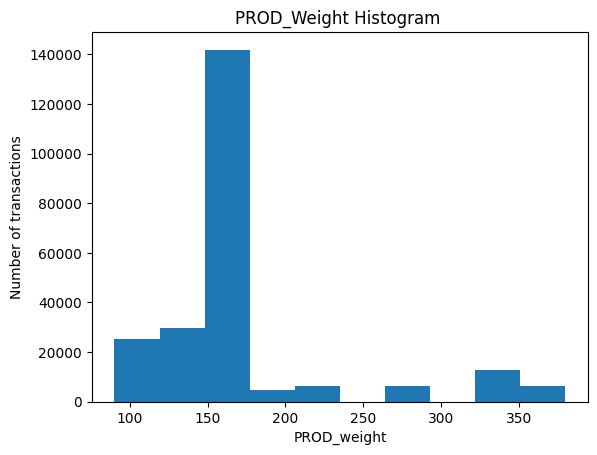

In [ ]:
plt.hist(transaction_df['PROD_Weight'])
plt.title("PROD_Weight Histogram ")
plt.xlabel("PROD_weight")
plt.ylabel("Number of transactions")
plt.show()

So with this plot we can state that the highest selling chip product weights between 150g-175g. Now to get more useful insights lets create new column with Brand name of chips

In [ ]:
transaction_df['Brand']=transaction_df['PROD_NAME'].str.split().str[0]
transaction_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_Weight,Brand
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [ ]:
transaction_df['Brand'].value_counts()

Kettle       41288
Smiths       25952
Pringles     25102
Doritos      22041
Thins        14075
RRD          11894
WW           10320
Cobs          9693
Infuzions     9550
Tostitos      9471
Tyrrells      6442
Twisties      6285
Grain         6272
Natural       6050
Cheezels      4603
CCs           4551
Red           4427
Dorito        3183
Infzns        3144
Smith         2963
Snbts         1576
Sunbites      1432
NCC           1419
French        1418
Name: Brand, dtype: int64

"Doritos" & "Dorito", "Snbts" & "Sunbites", "Smith" & "Smiths", "Red" & "RRD"

These are same brands, lets correct them

In [ ]:
transaction_df['Brand'].replace('Dorito','Doritos',inplace=True)
transaction_df['Brand'].replace('Snbts','Sunbites',inplace=True)
transaction_df['Brand'].replace('Smith','Smiths',inplace=True)
transaction_df['Brand'].replace('Red','RRD',inplace=True)

In [ ]:
transaction_df['Brand'].value_counts()

Kettle       41288
Smiths       28915
Doritos      25224
Pringles     25102
RRD          16321
Thins        14075
WW           10320
Cobs          9693
Infuzions     9550
Tostitos      9471
Tyrrells      6442
Twisties      6285
Grain         6272
Natural       6050
Cheezels      4603
CCs           4551
Infzns        3144
Sunbites      3008
NCC           1419
French        1418
Name: Brand, dtype: int64

Now the brand name are fine, lets a plot histogram to know transactions better 

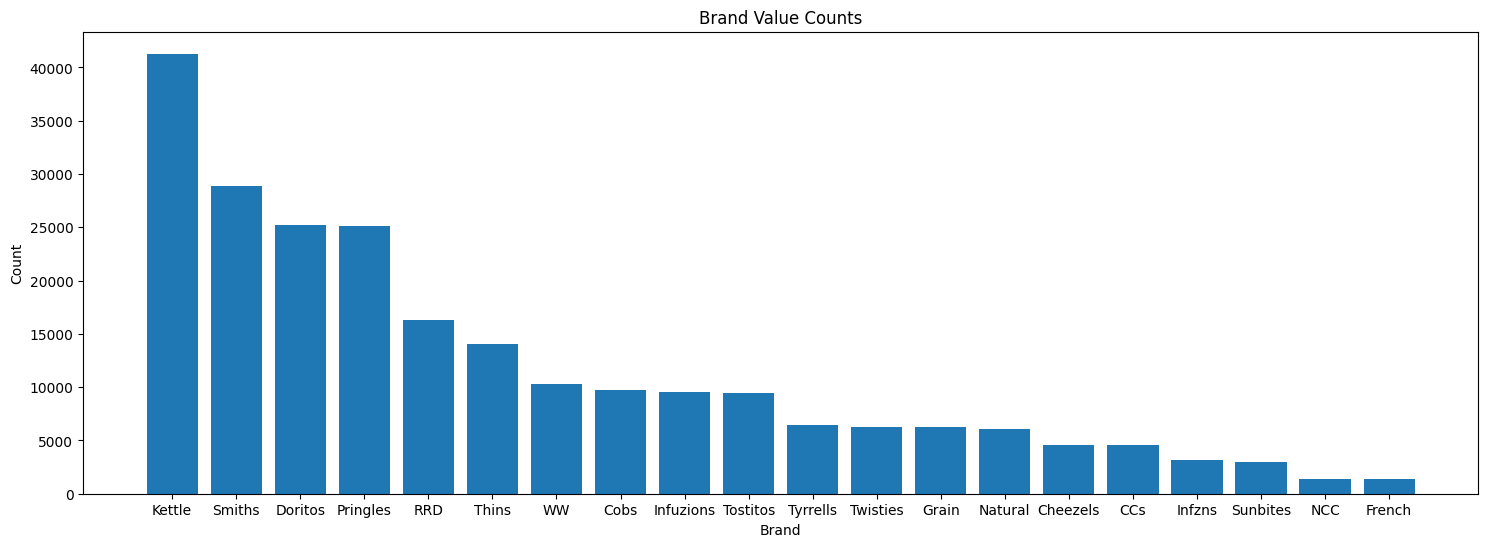

In [ ]:
brand_counts=transaction_df['Brand'].value_counts()

fig, ax=plt.subplots(figsize=(18,6))
ax.bar(brand_counts.index, brand_counts.values)
ax.set_title("Brand Value Counts")
ax.set_xlabel("Brand")
ax.set_ylabel("Count")
plt.show()

Now lets explor the customer data

In [ ]:
purchase_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase_df['PREMIUM_CUSTOMER'].describe()

count          72637
unique             3
top       Mainstream
freq           29245
Name: PREMIUM_CUSTOMER, dtype: object

In [ ]:
purchase_df['LIFESTAGE'].describe()

count        72637
unique           7
top       RETIREES
freq         14805
Name: LIFESTAGE, dtype: object

In [ ]:
purchase_df.shape

(72637, 3)

In [ ]:
transaction_df.shape

(233151, 10)

Time to Join the both dataframes


In [ ]:
joined_df = pd.merge(transaction_df,purchase_df,on='LYLTY_CARD_NBR', how='left')
joined_df.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_Weight,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
joined_df.shape

(233151, 12)

The number of rows same as transaction_df, lets check if there is any column wit null values

In [ ]:
joined_df.columns[joined_df.isnull().any()]


Index([], dtype='object')

Alright so there are no null values in column. So our this data is now ready to export.


In [ ]:
joined_df.to_csv("Chips_Products.csv",index=False)